In [1]:
#Filter 적용하기

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

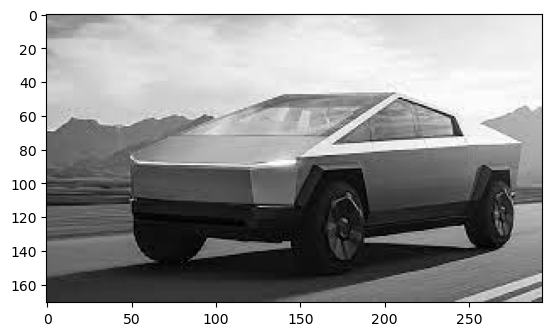

In [3]:
#image read -> transfer grayscale
image = cv2.imread('../Data/car.png', 0)

plt.imshow(image, 'gray')
plt.show()


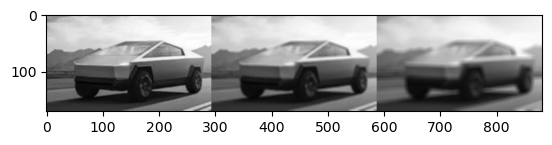

In [4]:
# hstack으로 사진 연결지어두기.
# blur 함수 사용하기.

blurred_1 = np.hstack([
    cv2.blur(image, (3,3)),
    cv2.blur(image, (5,5)),
    cv2.blur(image, (9,9))
])

plt.imshow(blurred_1, 'gray')
plt.show()

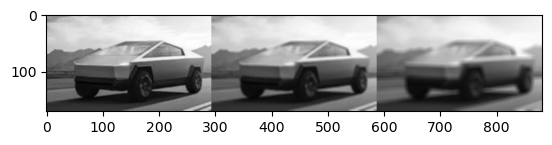

In [5]:
# gaussian filter

image = cv2.imread('../Data/car.png', 0)

gaussian_blurred_1 = np.hstack([
    cv2.blur(image, (3,3),0),
    cv2.blur(image, (5,5),0),
    cv2.blur(image, (9,9),0)
])

plt.imshow(gaussian_blurred_1, 'gray')
plt.show()

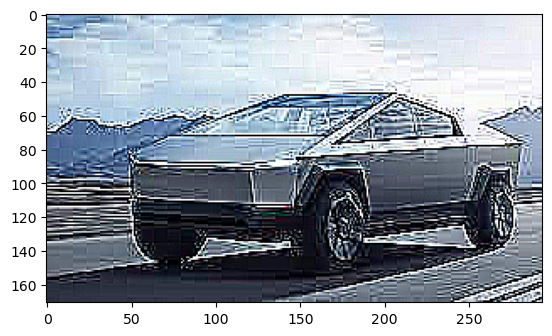

In [6]:
#custom filter를 이용해 sharpening 시키기.

image = cv2.imread('../Data/car.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

filter = np.array(([-1, -1, -1], [-1, 9, -1], [-1, -1, -1]))
sharpen_img = cv2.filter2D(image, -1, filter)

plt.imshow(sharpen_img)
plt.show()

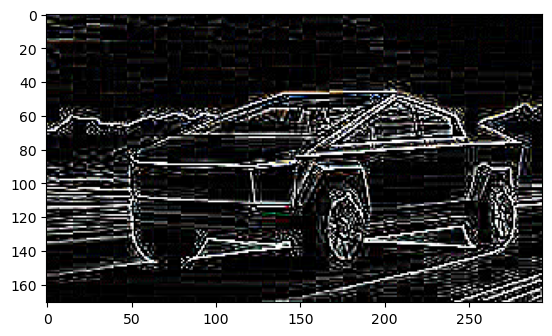

In [7]:
# 멕시칸 햇 / 라플라시안 필터(image sharpening)

image = cv2.imread('../Data/car.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

filter = np.array(([-1, -1, -1], [-1, 9, -1], [-1, -1, -1]))
sharpen_img_1 = cv2.filter2D(image, -1, filter)

filter = np.array(([0, 0, -1, 0, 0], [0, -1, -2, -1, 0], [-1, -2, 16, -2, -1], [0, -1, -2, -1, 0], [0, 0, -1, 0, 0]))

maxican_hat_img_1 = cv2.filter2D(image, -1, filter)

plt.imshow(maxican_hat_img_1)
plt.show()

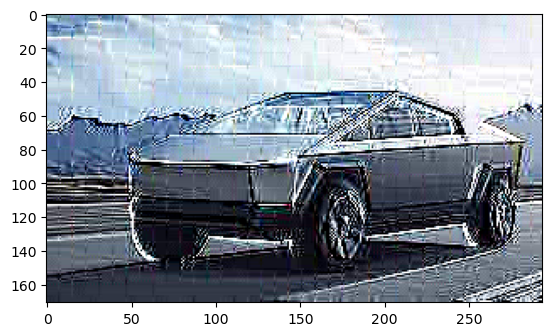

In [8]:
image = cv2.imread('../Data/car.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
#custom filter
filter = np.array([[1,1,-2], [-4,6,-5], [5, -1, 0]])
    
#custom filter 적용
custom_filter_image = cv2.filter2D(image, -1, filter)
        
plt.imshow(custom_filter_image)
plt.show()

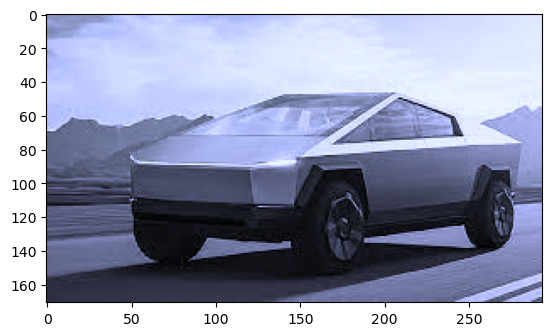

In [9]:
#다양한 효과 필터 만들기

image = cv2.imread('../Data/car.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 효과 필터 적용

filter_ = np.array([[0.272, 0.534, 0.131],[0.119, 0.686, 0.168],[0.393, 0.769, 0.189]])
sepia_img = cv2.transform(image, filter_)

plt.imshow(sepia_img)
plt.show()

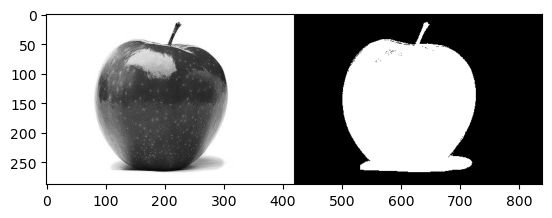

In [11]:
#확장, 침식 실험

image_path = '../Data/apple.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(image, 230, 255, cv2.THRESH_BINARY_INV)
image_list = np.hstack([
    image,
    mask
])

plt.imshow(image_list, 'gray')
plt.show()

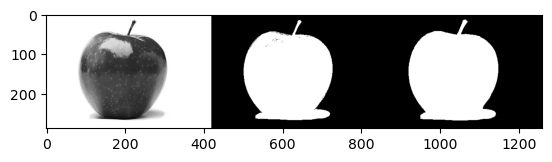

In [14]:
image_path = '../Data/apple.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3,3), np.uint8)

dilation = cv2.dilate(mask, kernel)

image_list = np.hstack([
    image,
    mask,
    dilation
])
plt.imshow(image_list, 'gray')
plt.show()

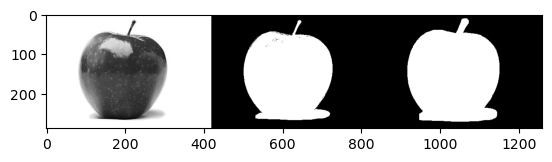

In [16]:
#확장, 침식 실험 2

image_path = '../Data/apple.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernel, iterations = 2)

image_list = np.hstack([
    image,
    mask,
    dilation
])
plt.imshow(image_list, 'gray')
plt.show()

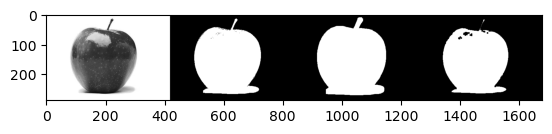

In [17]:
#확장, 침식 실험 3

image_path = '../Data/apple.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernel, iterations = 2)
erosion = cv2.erode(mask, kernel)

image_list = np.hstack([
    image,
    mask,
    dilation,
    erosion
])
plt.imshow(image_list, 'gray')
plt.show()

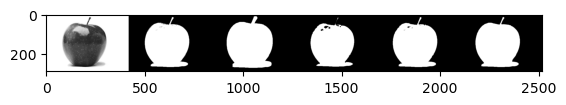

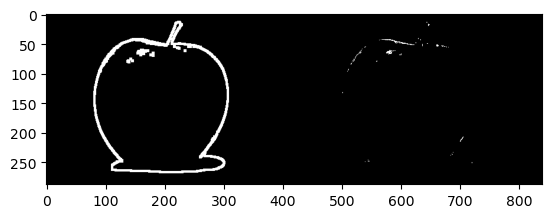

In [22]:
#확장, 침식 실험 4

image_path = '../Data/apple.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((5,5), np.uint8)

dilation = cv2.dilate(mask, kernel, iterations = 2)
erosion = cv2.erode(mask, kernel)

#개폐 open close

opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernel)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernel)

image_list = np.hstack([
    image,
    mask,
    dilation,
    erosion,
    opening,
    closing
])

image_list2 = np.hstack([
    mg,
    th
])

plt.imshow(image_list, 'gray')
plt.show()

plt.imshow(image_list2, 'gray') #경계면이 사라짐.
plt.show()